# Bank Marketing Data Analysis
This notebook presents an analysis of the `bankmarketing.csv` dataset, which includes data related to a bank's marketing campaigns. The main goal is to understand customer behavior and predict whether a client will subscribe to a term deposit.

## Step 1: Data Collection

In [1]:
# Importing necessary Libraries:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

In [2]:
# Load the dataset:

df = pd.read_csv('bankmarketing.csv')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


## Step 2: Data Understanding

In [3]:
# To Display the first 5 rows:

df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
# To Display last 5 rows:

df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [5]:
# Check the Shape of the data:

df.shape

(41188, 21)

In [6]:
# To Displays the columns:

df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [7]:
# To Check the Datatypes of Data:

print(df.dtypes)

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object


In [8]:
# Gets General information about the data:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [9]:
# Checking for missing values:

df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

- There are no missing data's in this dataset.

In [10]:
# Creating the Data Dictionary with first column being datatype:

Data_dict = pd.DataFrame(df.dtypes)
Data_dict

,0
age,int64
job,object
marital,object
education,object
default,object
housing,object
loan,object
contact,object
month,object
day_of_week,object


In [11]:
# Identifying unique values . For this I've used nunique() which returns unique elements in the object:

Data_dict['UniqueVal'] = df.nunique()
Data_dict

,0,UniqueVal
age,int64,78
job,object,12
marital,object,4
education,object,8
default,object,3
housing,object,3
loan,object,3
contact,object,2
month,object,10
day_of_week,object,5


In [12]:
# identifying count of the variable:

Data_dict['Count'] = df.count()
Data_dict

,0,UniqueVal,Count
age,int64,78,41188
job,object,12,41188
marital,object,4,41188
education,object,8,41188
default,object,3,41188
housing,object,3,41188
loan,object,3,41188
contact,object,2,41188
month,object,10,41188
day_of_week,object,5,41188


In [13]:
# Basic Statistics view of numerical value:

df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [14]:
# To see the categorical statistic:

df.describe(include='O')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [15]:
# To checking the missing values in numerical values: 

missing = df.isnull().sum()
print(missing[missing > 0])

Series([], dtype: int64)


<Axes: >

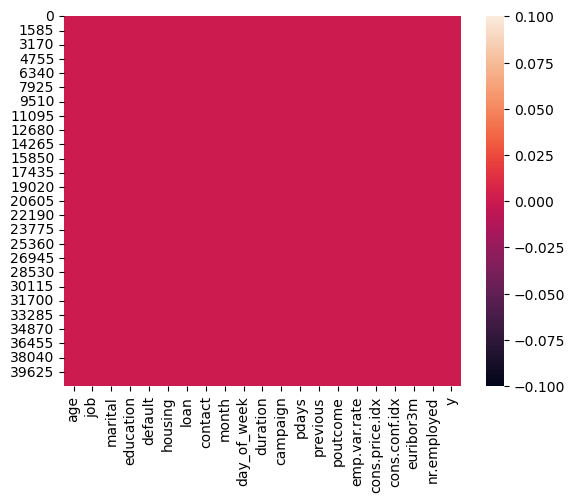

In [16]:
# To see the heatmap for confirm not missing values

sns.heatmap(df.isnull())

## Step 3: Data Cleaning

### Outlier Handling

In [17]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

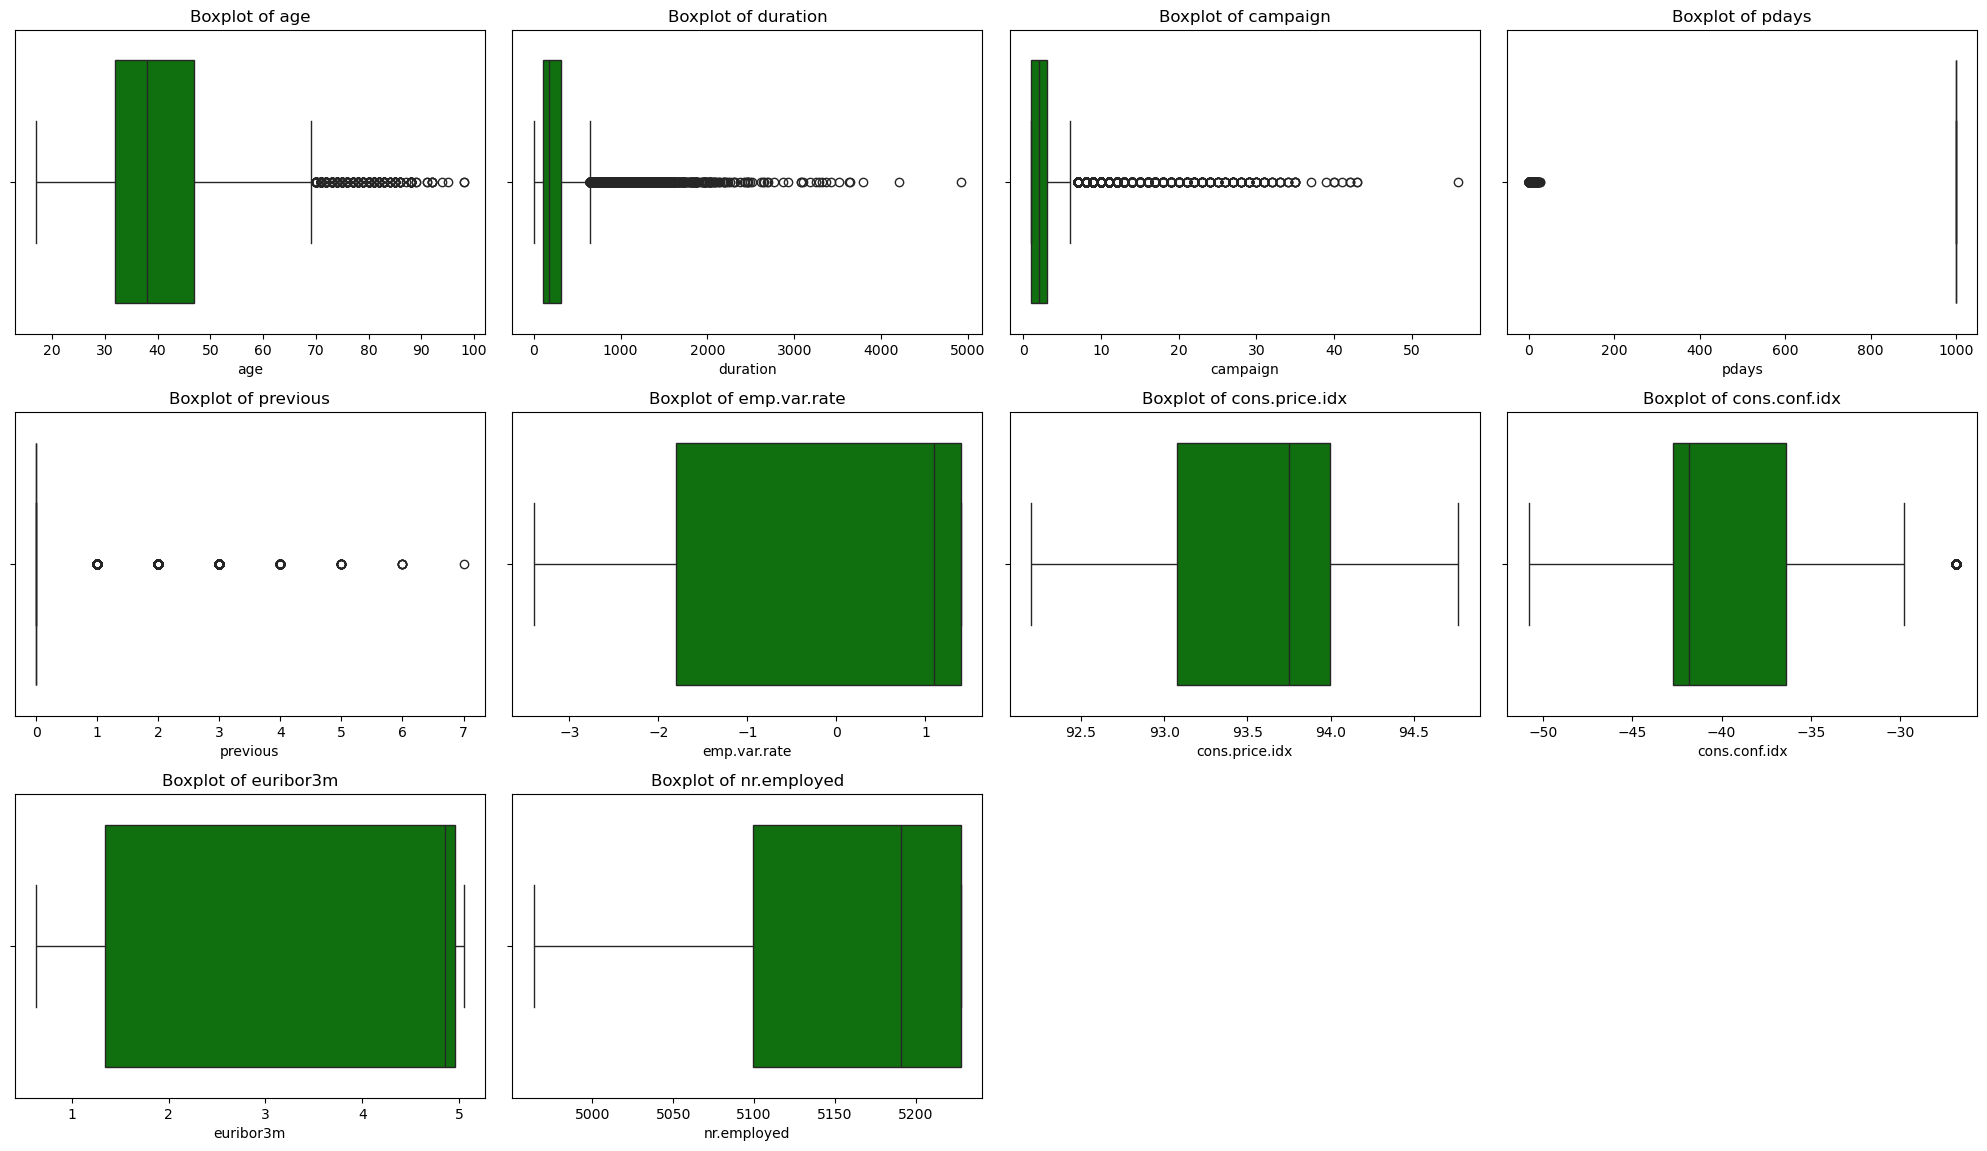

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Columns to plot
columns = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

plt.figure(figsize=(20, 15))  # Adjust figure size
windnum = 1

# Loop through selected columns
for i in columns:
    plt.subplot(4, 4, windnum)  # Adjust grid if needed
    sns.boxplot(x = df[i], color='green')  # Use x=df[i] for true horizontal boxplot
    plt.title(f'Boxplot of {i}')  # Add title for clarity
    windnum += 1

plt.tight_layout()
plt.show()

In [20]:
df.age.median()

38.0

In [21]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


## Before Handling Outliers:

In [22]:
# Columns to check for outliers
outlier_columns = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

# Loop through each column and check for outliers
for col in outlier_columns:
    print(f"\nChecking for outliers in '{col}'...\n")

    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1  # Interquartile Range

    # Compute lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    print(f"Lower bound for {col}: {lower_bound}")
    print(f"Upper bound for {col}: {upper_bound}")

    # Count outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Number of outliers in {col}: {len(outliers)}")


Checking for outliers in 'age'...

Lower bound for age: 9.5
Upper bound for age: 69.5
Number of outliers in age: 469

Checking for outliers in 'duration'...

Lower bound for duration: -223.5
Upper bound for duration: 644.5
Number of outliers in duration: 2963

Checking for outliers in 'campaign'...

Lower bound for campaign: -2.0
Upper bound for campaign: 6.0
Number of outliers in campaign: 2406

Checking for outliers in 'pdays'...

Lower bound for pdays: 999.0
Upper bound for pdays: 999.0
Number of outliers in pdays: 1515

Checking for outliers in 'previous'...

Lower bound for previous: 0.0
Upper bound for previous: 0.0
Number of outliers in previous: 5625

Checking for outliers in 'emp.var.rate'...

Lower bound for emp.var.rate: -6.6000000000000005
Upper bound for emp.var.rate: 6.200000000000001
Number of outliers in emp.var.rate: 0

Checking for outliers in 'cons.price.idx'...

Lower bound for cons.price.idx: 91.69650000000001
Upper bound for cons.price.idx: 95.3725
Number of outl

- 'age' is having 469 Outliers
- 'duration' is having 2963 Outliers
- 'campaign' is having 2406 Outliers
- 'pdays' is having 1515 Outliers
- 'previous' is having 5625 Outliers
- 'cons.conf.idx' is having 447 outliers

### These are the Outliers of this dataset. 

## After Handling Outliers:

In [23]:
# Handling outliers by replacing them with the median
for col in outlier_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df.loc[(df[col] < lower_bound) | (df[col] > upper_bound), col] = df[col].median()

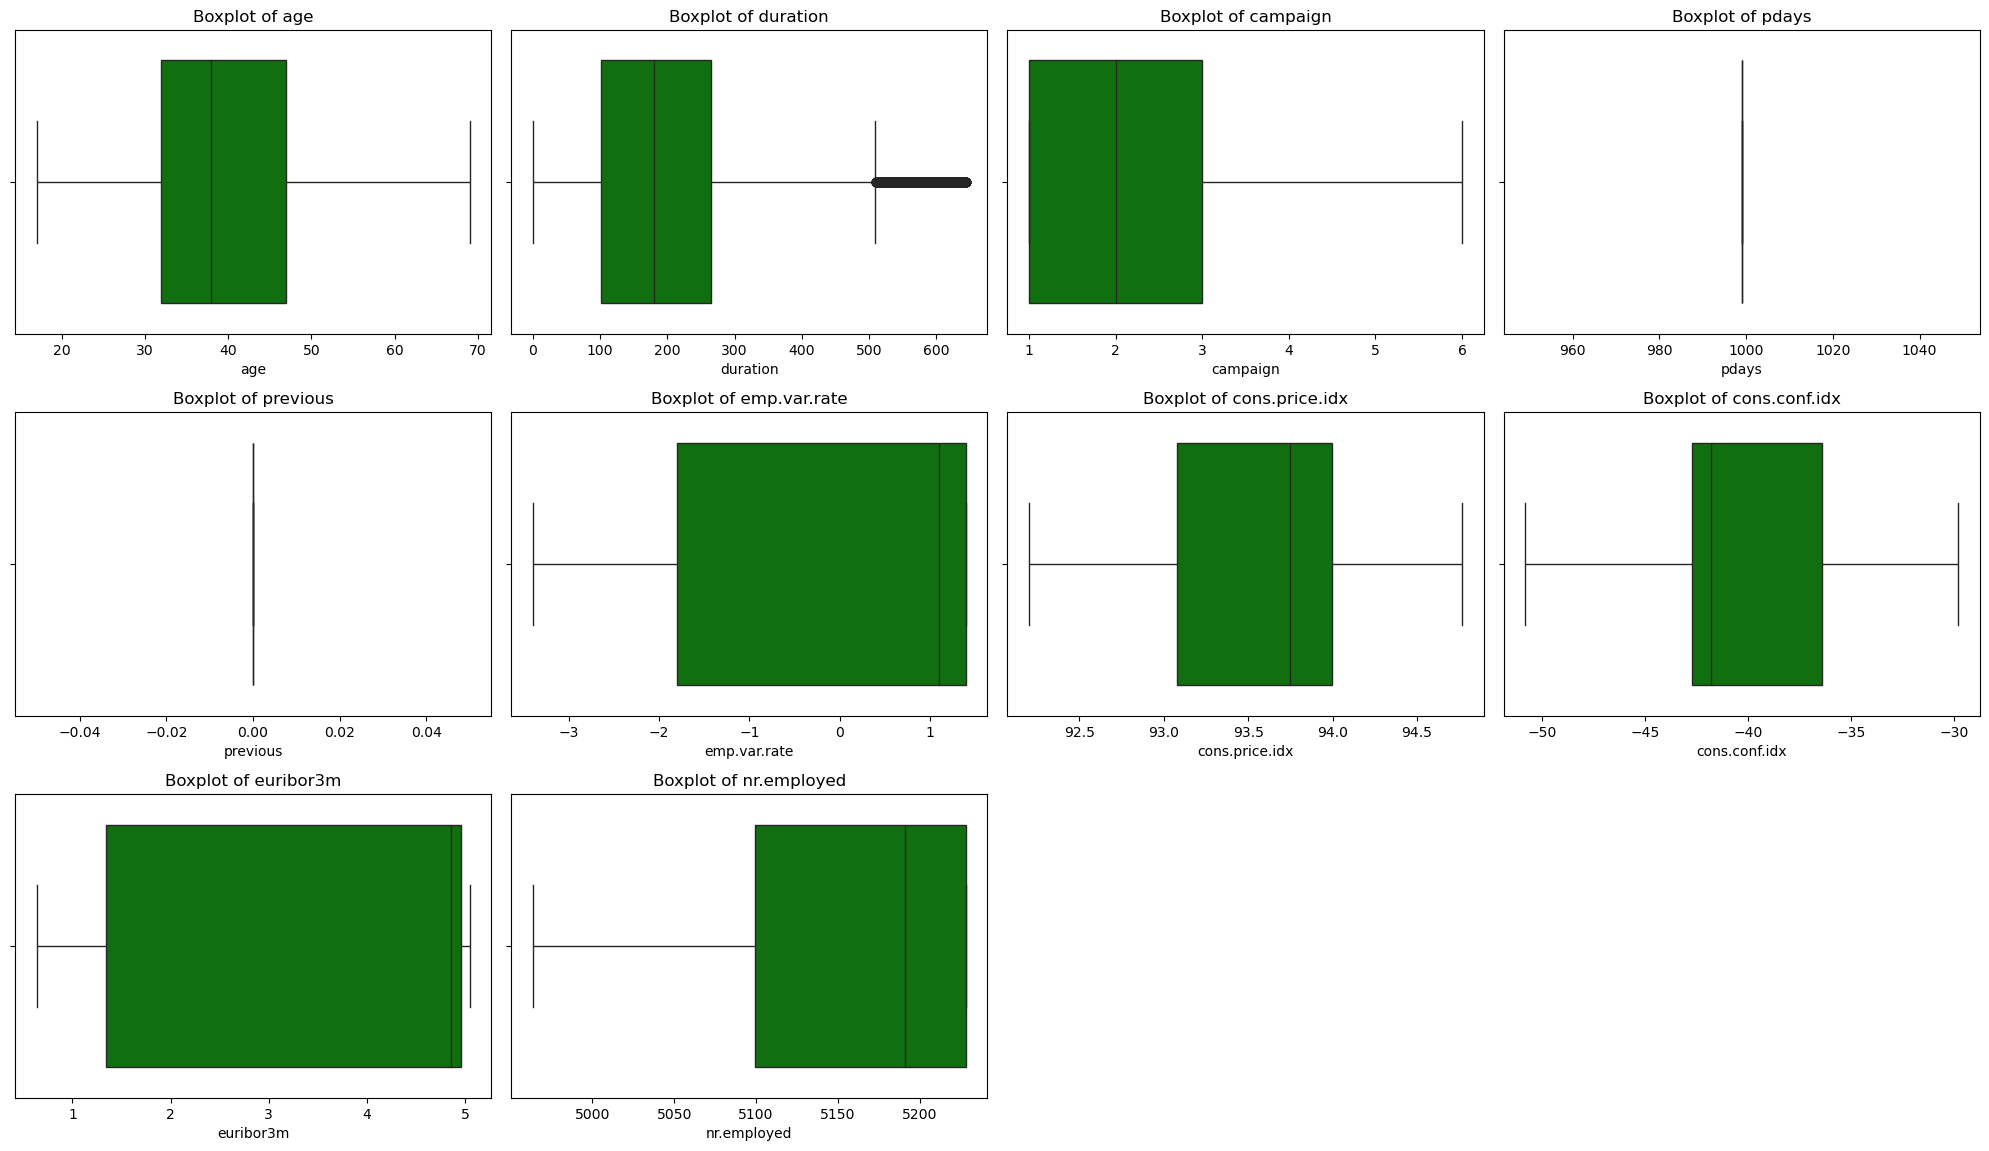

In [24]:
# Columns to plot
columns = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

plt.figure(figsize=(20, 15))  # Adjust figure size
windnum = 1

# Loop through selected columns
for i in columns:
    plt.subplot(4, 4, windnum)  # Adjust grid if needed
    sns.boxplot(x=df[i], color='green')  # Use x=df[i] for true horizontal boxplot
    plt.title(f'Boxplot of {i}')  # Add title for clarity
    windnum += 1

plt.tight_layout()
plt.show()

In [25]:
# Columns to check for outliers
outlier_columns = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

# Loop through each column and check for outliers
for col in outlier_columns:
    print(f"\nChecking for outliers in '{col}'...\n")

    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1  # Interquartile Range

    # Compute lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    print(f"Lower bound for {col}: {lower_bound}")
    print(f"Upper bound for {col}: {upper_bound}")

    # Count outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Number of outliers in {col}: {len(outliers)}")


Checking for outliers in 'age'...

Lower bound for age: 9.5
Upper bound for age: 69.5
Number of outliers in age: 0

Checking for outliers in 'duration'...

Lower bound for duration: -142.5
Upper bound for duration: 509.5
Number of outliers in duration: 1803

Checking for outliers in 'campaign'...

Lower bound for campaign: -2.0
Upper bound for campaign: 6.0
Number of outliers in campaign: 0

Checking for outliers in 'pdays'...

Lower bound for pdays: 999.0
Upper bound for pdays: 999.0
Number of outliers in pdays: 0

Checking for outliers in 'previous'...

Lower bound for previous: 0.0
Upper bound for previous: 0.0
Number of outliers in previous: 0

Checking for outliers in 'emp.var.rate'...

Lower bound for emp.var.rate: -6.6000000000000005
Upper bound for emp.var.rate: 6.200000000000001
Number of outliers in emp.var.rate: 0

Checking for outliers in 'cons.price.idx'...

Lower bound for cons.price.idx: 91.69650000000001
Upper bound for cons.price.idx: 95.3725
Number of outliers in con

- 'age' is having 469 Outliers as been cleared now 0 Outliers
- 'duration' is having 2963 Outliers as been cleared now 0 Outliers
- 'campaign' is having 2406 Outliers as been cleared now 0 Outliers
- 'pdays' is having 1515 Outliers as been cleared now 0 Outliers
- 'previous' is having 5625 Outliers as been cleared now 0 Outliers
- 'cons.conf.idx' is having 447 outliers as been cleared now 0 Outliers

### Now, there are no outliers in this bankmarketing dataset.

In [26]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,38,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [27]:
df.shape

(41188, 21)

- Now, it's a cleaned bankmarketing dataset.

## Step 4: Data Exploration

<Axes: xlabel='marital', ylabel='count'>

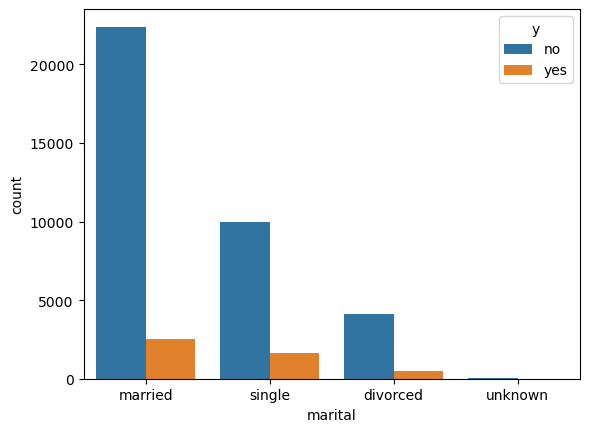

In [28]:
sns.countplot(x = 'marital', hue = 'y', data = df)

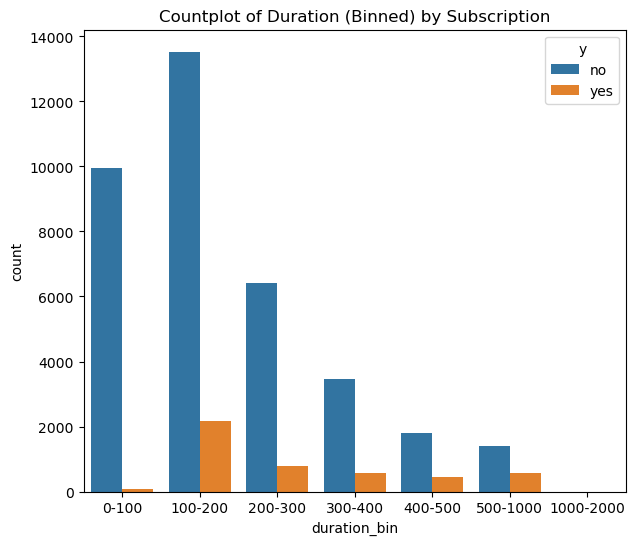

In [29]:
# Create bins:
df['duration_bin'] = pd.cut(df['duration'], bins=[0,100,200,300,400,500,1000,2000], labels=["0-100","100-200","200-300","300-400","400-500","500-1000","1000-2000"])

plt.figure(figsize=(7,6))
sns.countplot(x='duration_bin', hue='y', data=df)
plt.title("Countplot of Duration (Binned) by Subscription")
plt.show()

<Axes: xlabel='campaign', ylabel='count'>

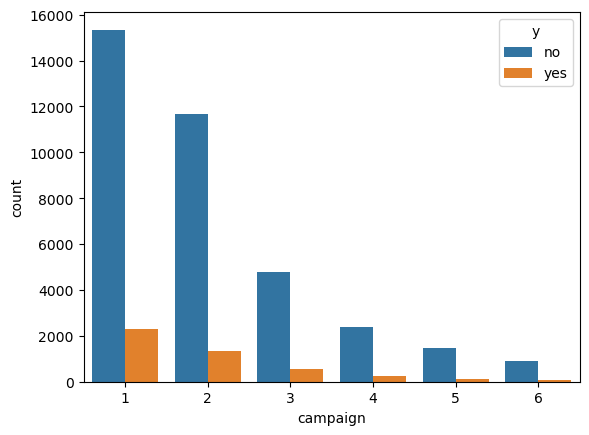

In [30]:
sns.countplot(x = 'campaign', hue = 'y', data = df)

<Axes: xlabel='month', ylabel='count'>

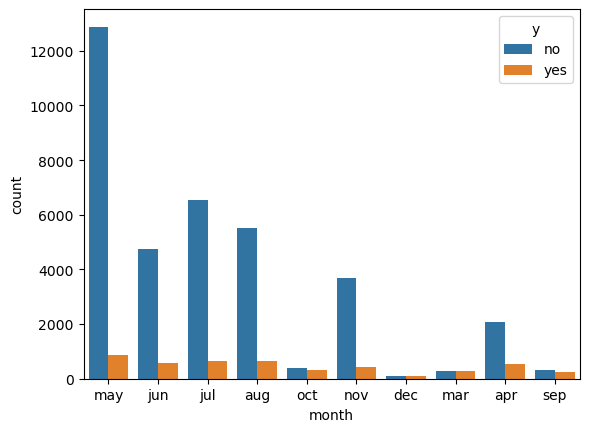

In [31]:
sns.countplot(x = 'month', hue = 'y', data = df)

<Axes: xlabel='poutcome', ylabel='count'>

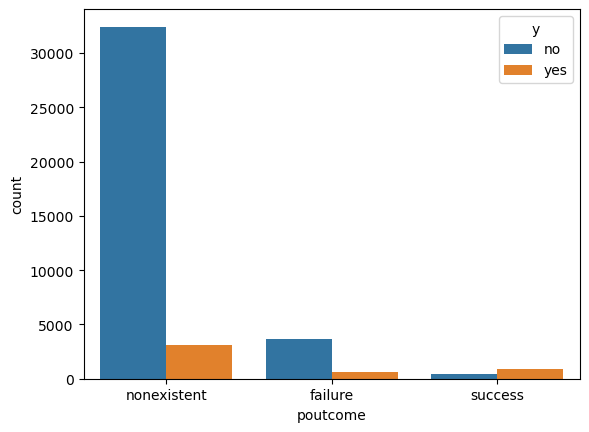

In [32]:
sns.countplot(x = 'poutcome', hue = 'y', data = df)

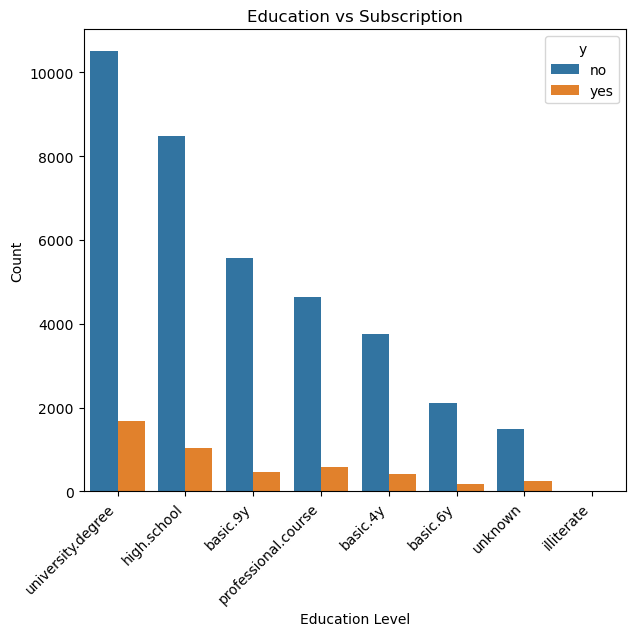

In [33]:
plt.figure(figsize=(7,6))
sns.countplot(x='education', hue='y', data=df,
              order=df['education'].value_counts().index)  # sorts by frequency

plt.title("Education vs Subscription")
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')  # rotate for readability
plt.show()

<Axes: xlabel='day_of_week', ylabel='count'>

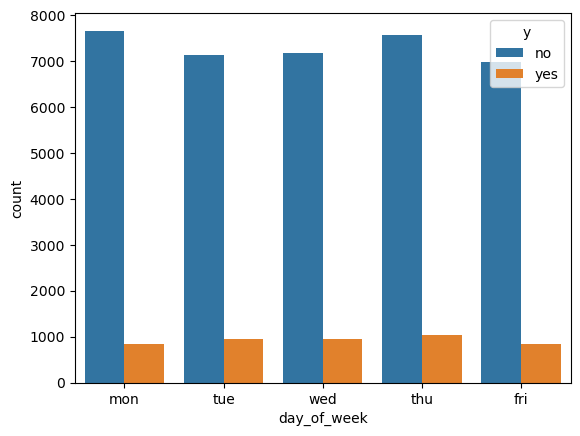

In [34]:
sns.countplot(x = 'day_of_week', hue = 'y', data = df)

<Axes: xlabel='contact', ylabel='count'>

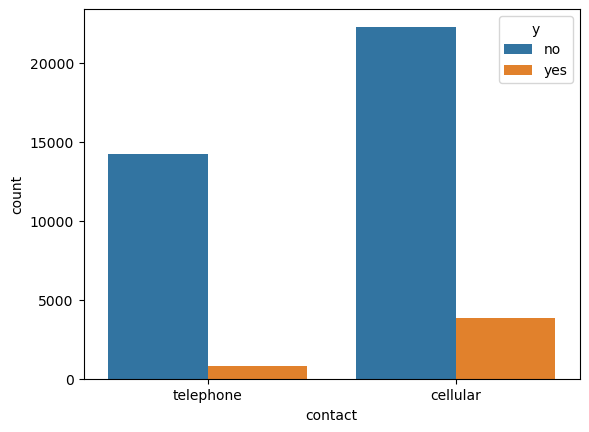

In [35]:
sns.countplot(x = 'contact', hue = 'y', data = df)

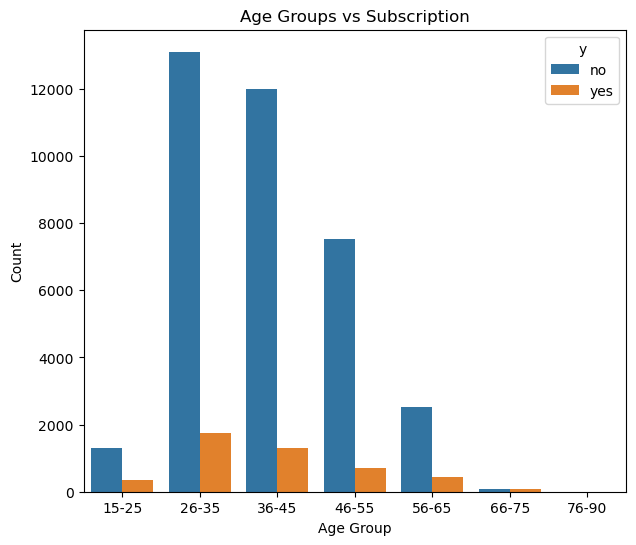

In [36]:
# Create age groups:
df['age_bin'] = pd.cut(df['age'], bins=[15,25,35,45,55,65,75,90],
                       labels=["15-25","26-35","36-45","46-55","56-65","66-75","76-90"])

plt.figure(figsize=(7,6))
sns.countplot(x='age_bin', hue='y', data=df)
plt.title("Age Groups vs Subscription")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.show()

## Step 5: Data Visualizations

## Univariate Analysis

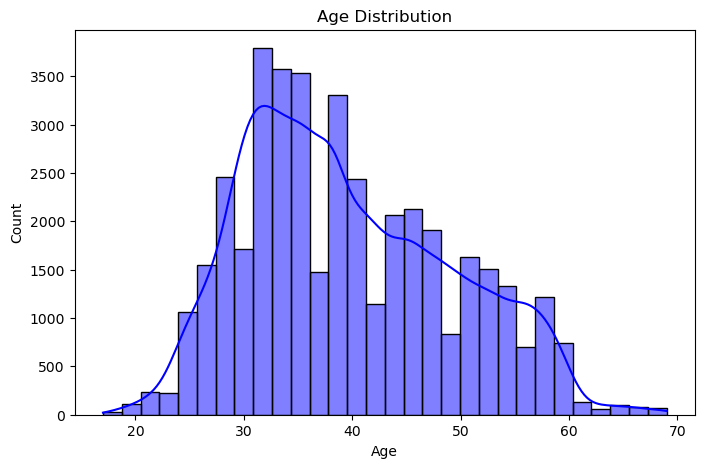

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.histplot(df['age'], bins=30, kde=True, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

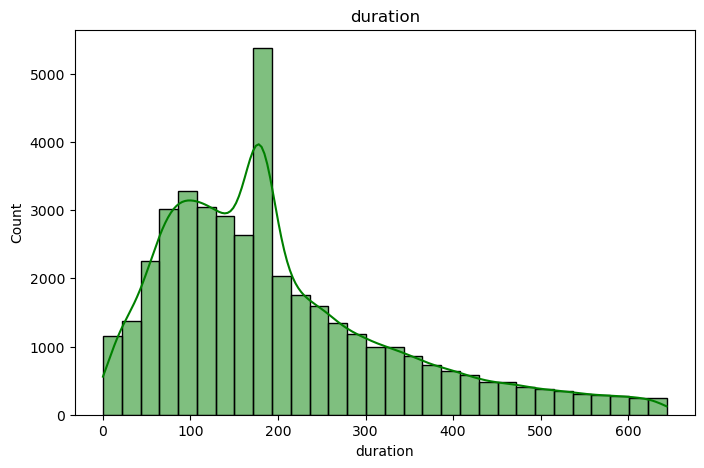

In [38]:
plt.figure(figsize=(8, 5))
sns.histplot(df['duration'], bins=30, kde=True, color='green')
plt.title('duration')
plt.xlabel('duration')
plt.ylabel('Count')
plt.show()

In [39]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'duration_bin',
       'age_bin'],
      dtype='object')

## Bivariate Analysis

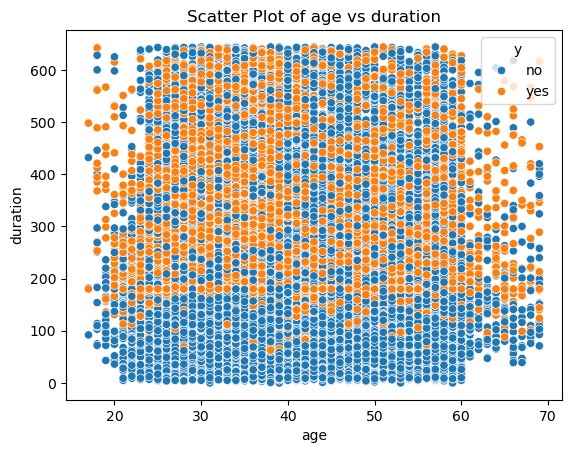

In [40]:
sns.scatterplot(x='age', y='duration', hue='y', data=df)
plt.title('Scatter Plot of age vs duration')
plt.xlabel('age')
plt.ylabel('duration')
plt.show()

## Multivariate Analysis

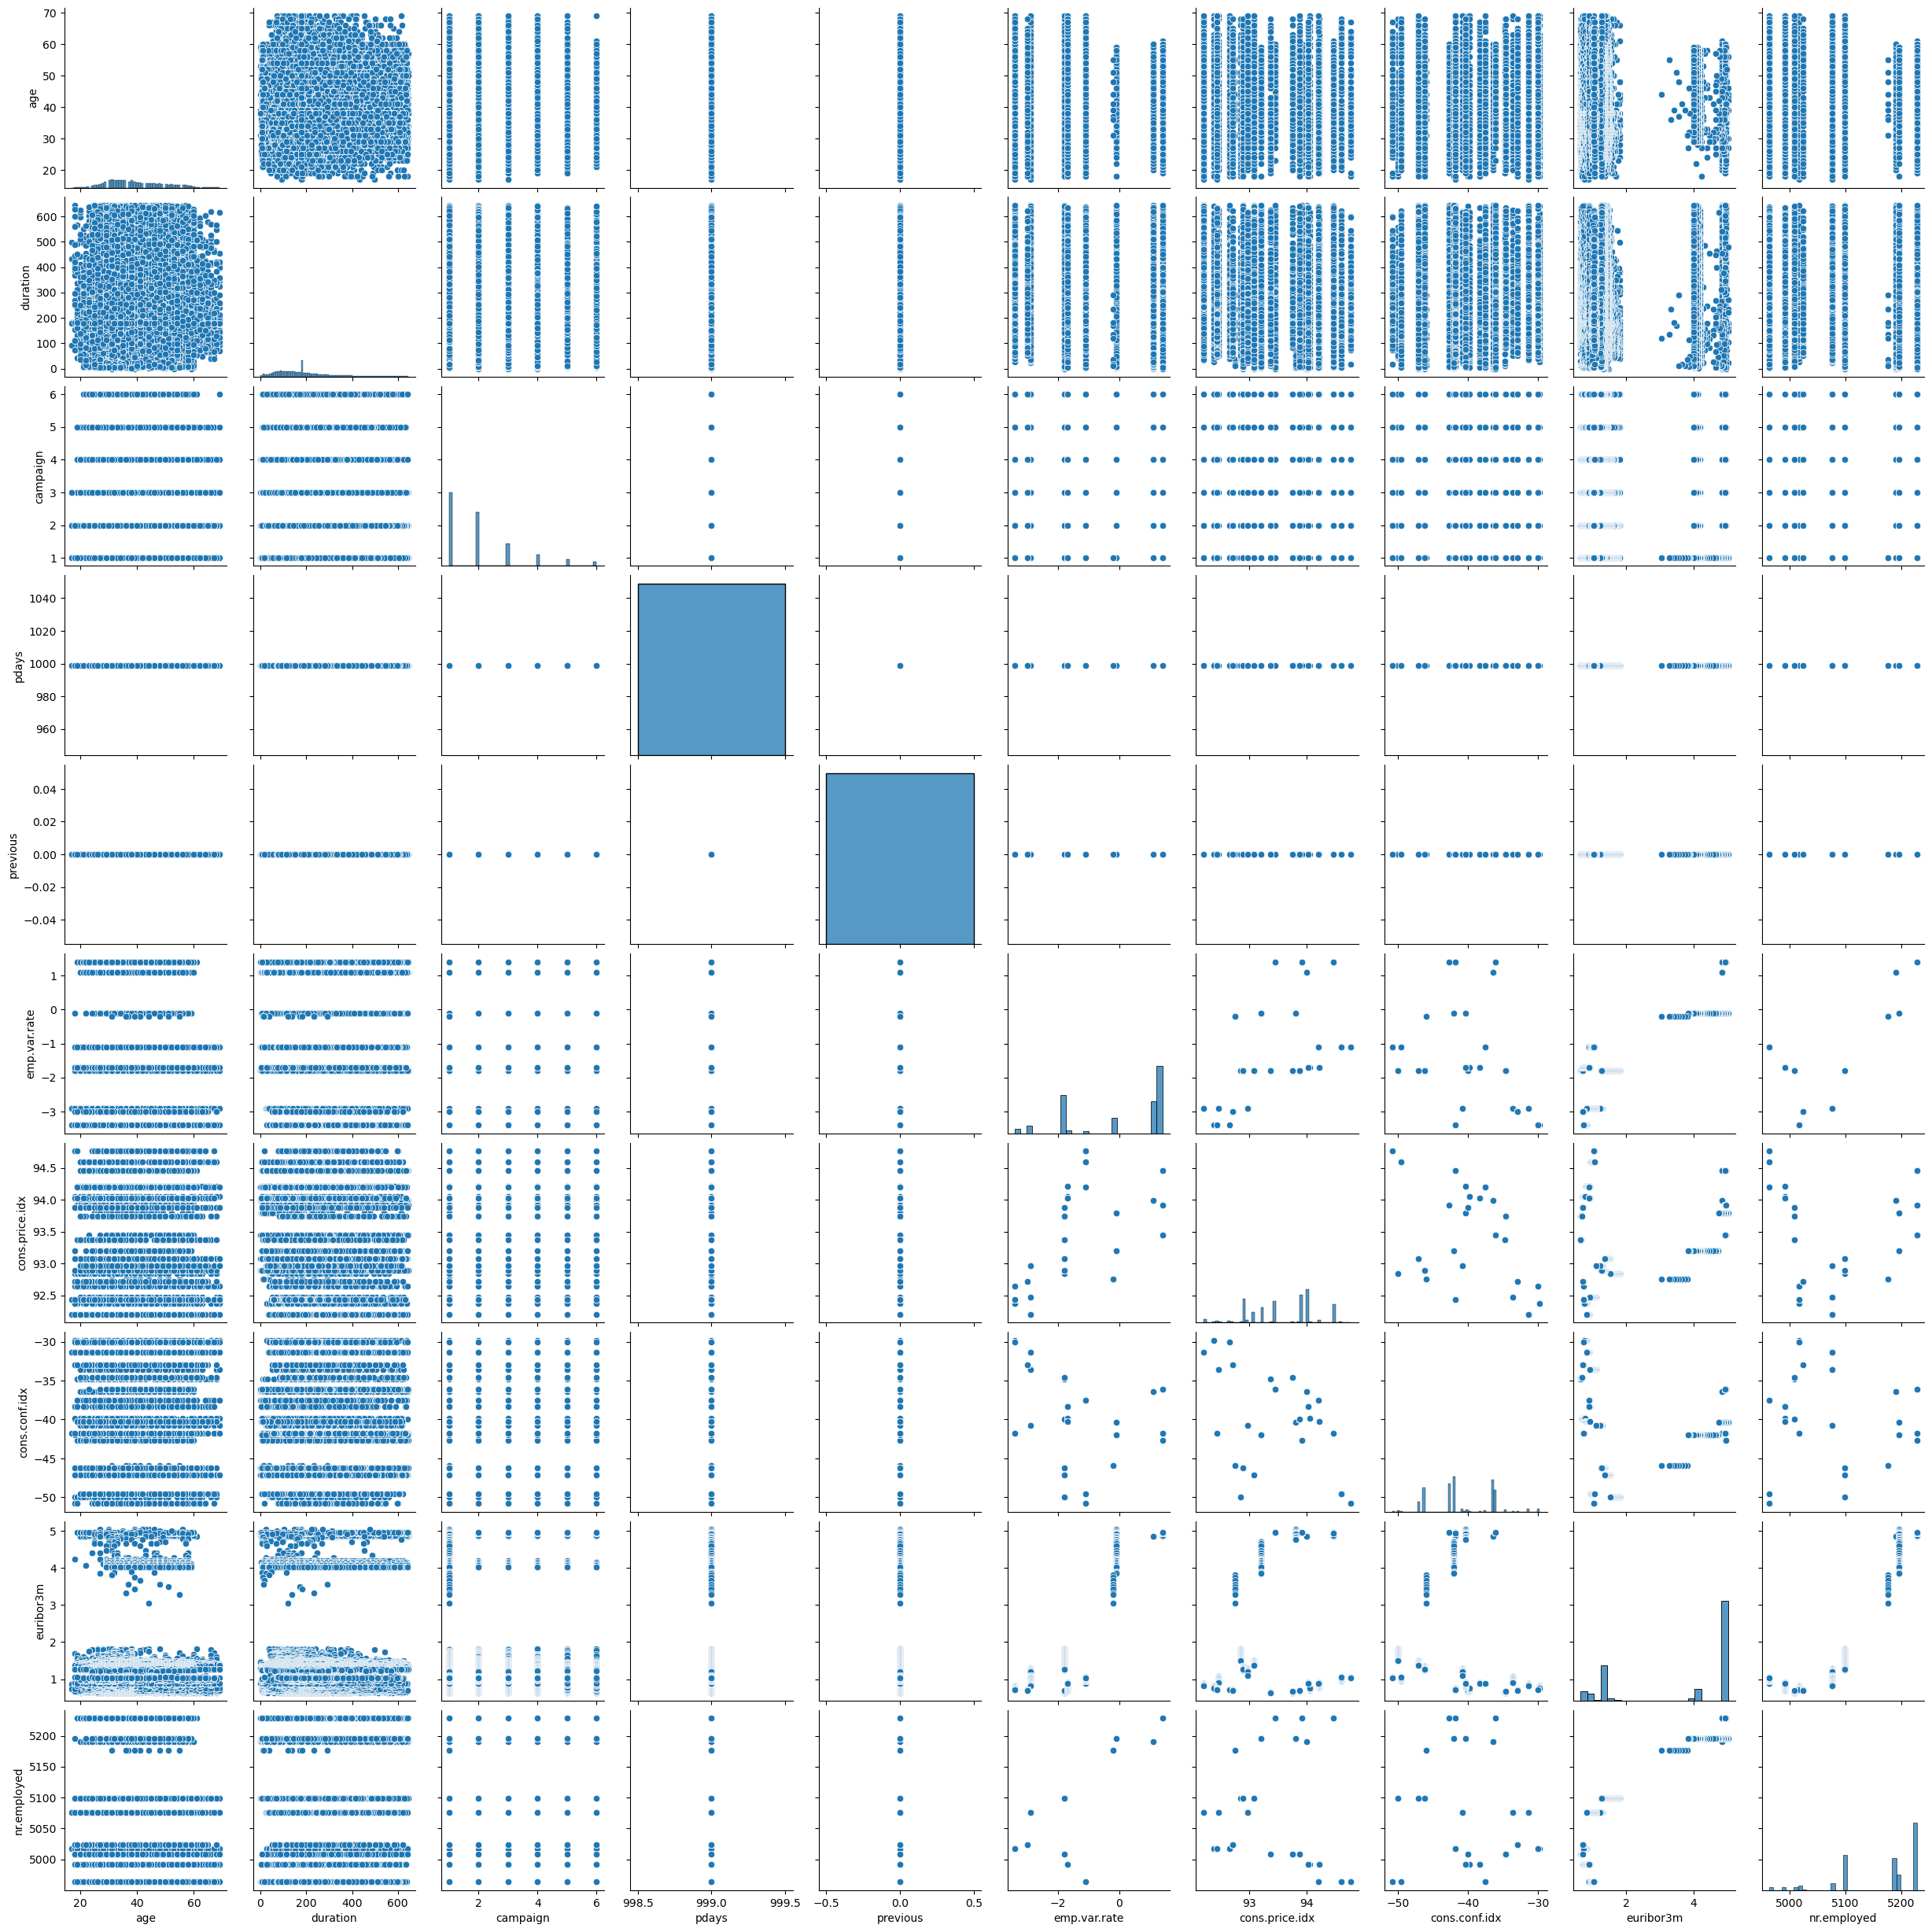

In [41]:
sns.pairplot(data=df)

## Correlation

In [42]:
# Convert categorical columns to numeric (if necessary)
df_numeric = df.select_dtypes(include=['number'])  # Keep only numeric columns

# Compute the correlation matrix
corr_matrix = df_numeric.corr()

# Display the correlation matrix
print(corr_matrix)

                     age  duration  campaign  pdays  previous  emp.var.rate  \
age             1.000000  0.003689  0.010070    NaN       NaN      0.070915   
duration        0.003689  1.000000 -0.052996    NaN       NaN     -0.058853   
campaign        0.010070 -0.052996  1.000000    NaN       NaN      0.097183   
pdays                NaN       NaN       NaN    NaN       NaN           NaN   
previous             NaN       NaN       NaN    NaN       NaN           NaN   
emp.var.rate    0.070915 -0.058853  0.097183    NaN       NaN      1.000000   
cons.price.idx  0.036777 -0.005718  0.073688    NaN       NaN      0.775334   
cons.conf.idx   0.101175  0.003219 -0.007044    NaN       NaN      0.287338   
euribor3m       0.083770 -0.065756  0.081501    NaN       NaN      0.972245   
nr.employed     0.067991 -0.085575  0.092293    NaN       NaN      0.906970   

                cons.price.idx  cons.conf.idx  euribor3m  nr.employed  
age                   0.036777       0.101175   0.083770  

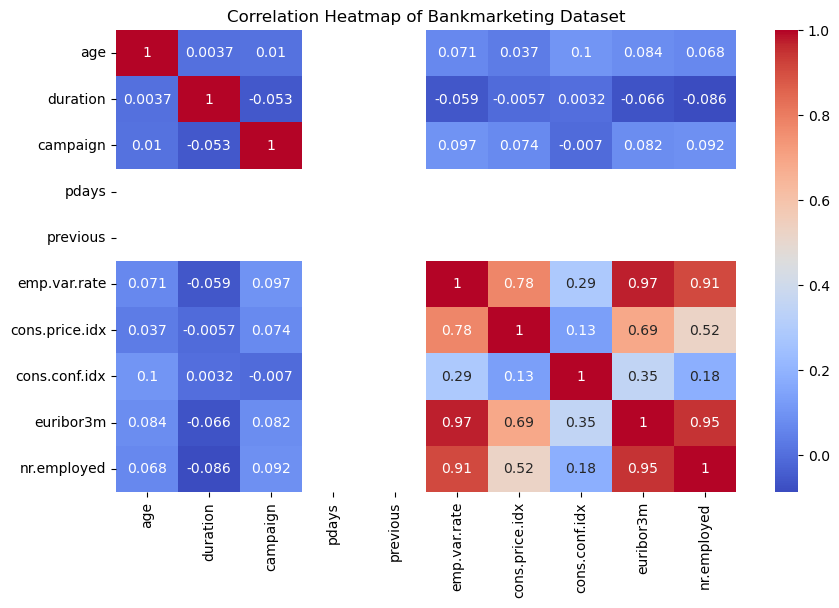

In [43]:
 #Create heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Bankmarketing Dataset")
plt.show()